<a href="https://colab.research.google.com/github/marcgym2/big-data/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import librosa
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') > 0.95:
                print("\nReached 95% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [3]:
# directorios de las canciones
dir_banda = "/content/drive/MyDrive/Songs/Banda"
dir_tumbados = "/content/drive/MyDrive/Songs/Corridos Tumbados"

# listas para almacenar los datos de entrenamiento y las etiquetas
X_train = []
y_train = []

duration = 10  # segundos

df = pd.DataFrame(columns=['Archivo', 'Duración', 'Etiqueta'])

In [4]:
# Cargar y preprocesar las canciones de banda
for file in os.listdir(dir_banda):
    # carga de datos de audio
    y, sr = librosa.load(os.path.join(dir_banda, file), sr=None)
    samples_per_track = sr * duration
    y = y[:samples_per_track] # seleccionar solo los primeros 10 segundos
    # transformación a espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    # normalización
    scaler = StandardScaler()
    D = scaler.fit_transform(D)
    # agregar al conjunto de datos de entrenamiento
    X_train.append(D[..., np.newaxis]) # +1 dimensión adicional
    y_train.append(0) # label 0

    # Agregar datos al DataFrame
    df = pd.concat([df, pd.DataFrame({
        'Archivo': [file],
        'Duración': [len(y) / sr],  # la duración es el número de muestras dividido por la frecuencia de muestreo
        'Etiqueta': [0]
    })], ignore_index=True)


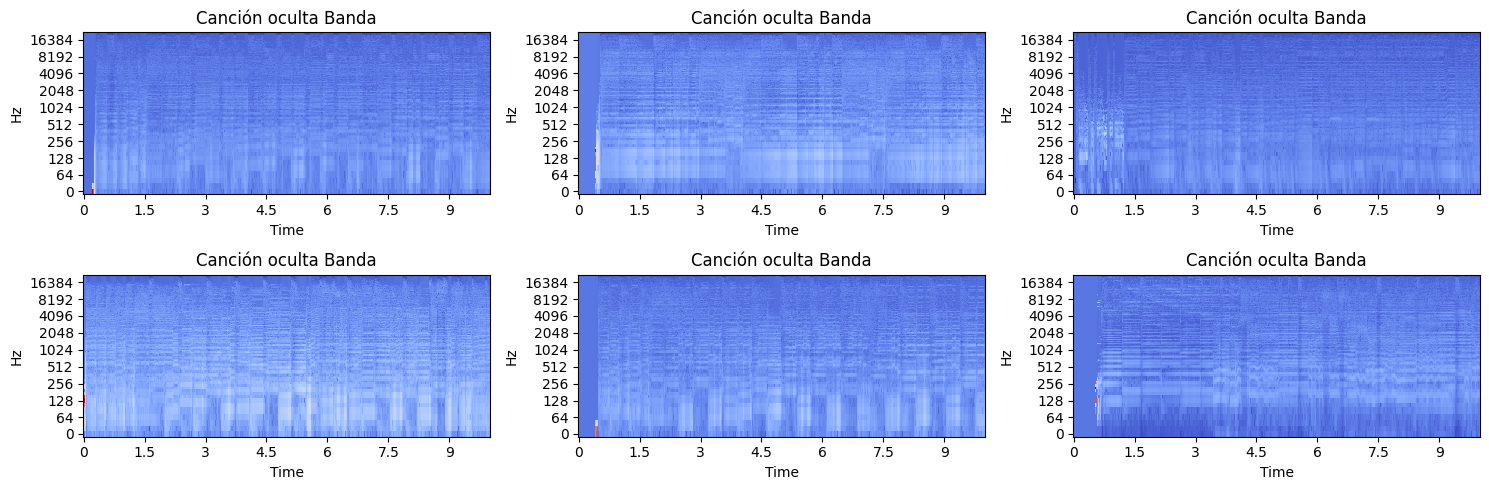

In [18]:
# Visualización de espectrograma

fig, ax = plt.subplots(2, 3, figsize=(15, 5))

for i, file in enumerate(os.listdir(dir_banda)[:6]):
    y_temp, sr_temp = librosa.load(os.path.join(dir_banda, file), sr=None)
    samples_per_track_temp = sr_temp * duration
    y_temp = y_temp[:samples_per_track_temp]
    D_temp = librosa.amplitude_to_db(np.abs(librosa.stft(y_temp)), ref=np.max)
    scaler_temp = StandardScaler()
    D_temp = scaler_temp.fit_transform(D_temp)


    librosa.display.specshow(D_temp, sr=sr_temp, x_axis='time', y_axis='log', ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title("Canción oculta Banda")

plt.tight_layout()
plt.show()


In [6]:
# Cargar y preprocesar las canciones de corridos tumbados
for file in os.listdir(dir_tumbados):
    # carga de datos de audio
    y, sr = librosa.load(os.path.join(dir_tumbados, file), sr=None)
    samples_per_track = sr * duration
    y = y[:samples_per_track] # seleccionar solo los primeros10 segundos
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    # normalización
    scaler = StandardScaler()
    D = scaler.fit_transform(D)
    # agregar al conjunto de datos de entrenamiento
    X_train.append(D[..., np.newaxis]) # +1 dimensión adicional
    y_train.append(1) # label 1

    # Agregar datos al DataFrame
    df = pd.concat([df, pd.DataFrame({
        'Archivo': [file],
        'Duración': [len(y) / sr],  # la duración es el número de muestras dividido por la frecuencia de muestreo
        'Etiqueta': [1]
    })], ignore_index=True)


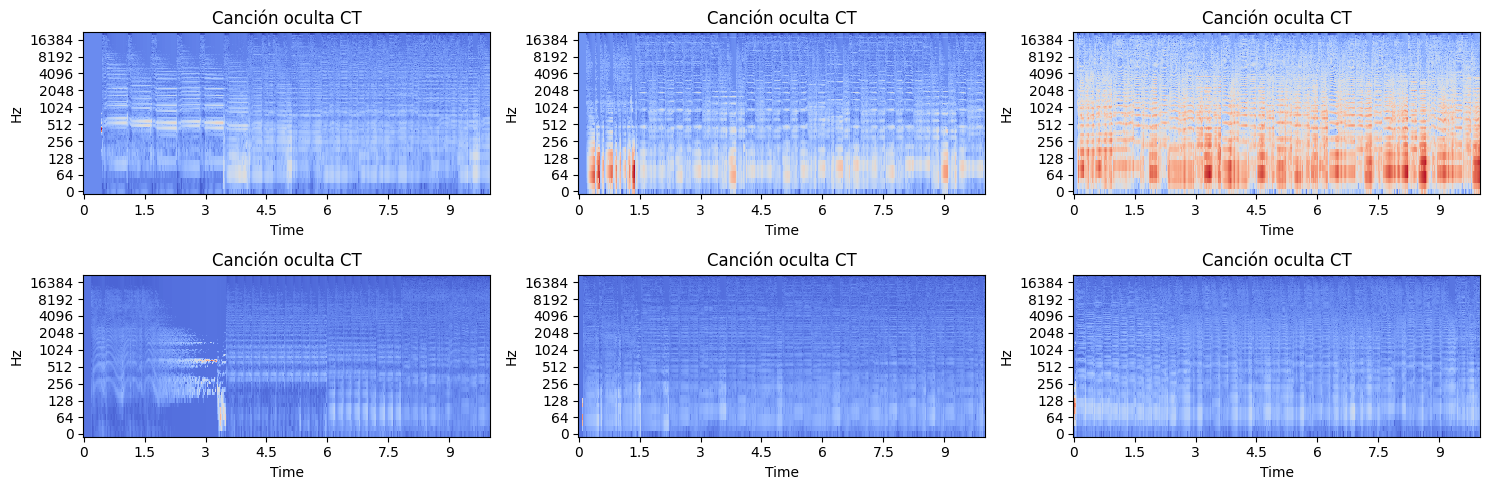

In [19]:
# Visualización de espectrograma

fig, ax = plt.subplots(2, 3, figsize=(15, 5))

for i, file in enumerate(os.listdir(dir_tumbados)[:6]):
    y_temp, sr_temp = librosa.load(os.path.join(dir_tumbados, file), sr=None)
    samples_per_track_temp = sr_temp * duration
    y_temp = y_temp[:samples_per_track_temp]
    D_temp = librosa.amplitude_to_db(np.abs(librosa.stft(y_temp)), ref=np.max)
    scaler_temp = StandardScaler()
    D_temp = scaler_temp.fit_transform(D_temp)

    librosa.display.specshow(D_temp, sr=sr_temp, x_axis='time', y_axis='log', ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title("Canción oculta CT")

plt.tight_layout()
plt.show()


In [20]:
# Imprimir el DataFrame
df_w = df.drop('Archivo', axis=1)
df_w

,Duración,Etiqueta
0,10.0,0
1,10.0,0
2,10.0,0
3,10.0,0
4,10.0,0
...,...,...
95,10.0,1
96,10.0,1
97,10.0,1
98,10.0,1


In [9]:
# convertir a numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)


In [10]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (100, 1025, 862, 1)
y_train shape: (100,)


In [11]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
#
input_shape = X_train[0].shape
input_shape

(1025, 862, 1)

In [13]:
# Crear el modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Imprimir un resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1023, 860, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 430, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 511, 430, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 428, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 254, 214, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 254, 214, 32)      0

In [15]:
# Entrenar el modelo
callbacks = myCallback()
history = model.fit(X_train, y_train, batch_size=16, epochs=20, callbacks=[callbacks])

Epoch 1/20
6/7 [========================>.....] - ETA: 0s - loss: 23.2836 - accuracy: 0.4688

7/7 [==============================] - 13s 520ms/step - loss: 22.5668 - accuracy: 0.4700
Epoch 2/20
7/7 [==============================] - 2s 324ms/step - loss: 2.9158 - accuracy: 0.5400
Epoch 3/20
7/7 [==============================] - 2s 320ms/step - loss: 0.7210 - accuracy: 0.4900
Epoch 4/20
7/7 [==============================] - 2s 335ms/step - loss: 0.6882 - accuracy: 0.5100
Epoch 5/20
7/7 [==============================] - 2s 335ms/step - loss: 0.6836 - accuracy: 0.6200
Epoch 6/20
7/7 [==============================] - 2s 321ms/step - loss: 0.6831 - accuracy: 0.6300
Epoch 7/20
7/7 [==============================] - 2s 305ms/step - loss: 0.6783 - accuracy: 0.6900
Epoch 8/20
7/7 [==============================] - 2s 299ms/step - loss: 0.6651 - accuracy: 0.7400
Epoch 9/20
7/7 [==============================] - 2s 300ms/step - loss: 0.6321 - accuracy: 0.6700
Epoch 10/20
7/7 [==============================] - 2s 305ms/step - loss: 0.5412 - accuracy: 0.7500
Epoch 11/20
7/7 [===========

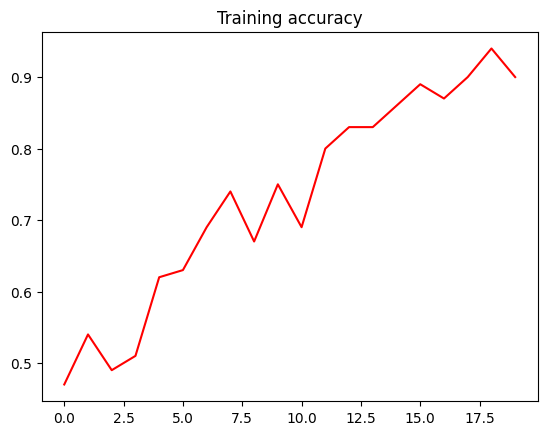

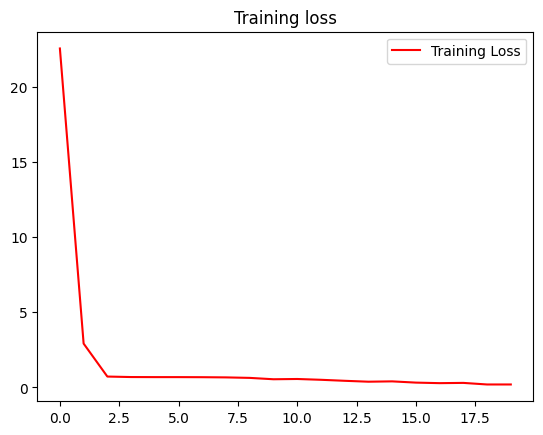

In [16]:
# Plot the model results
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()